In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [3]:
from google.colab import files

uploaded = files.upload()

Saving credit_risk_dataset.csv to credit_risk_dataset.csv


In [19]:
debt_risk = pd.read_csv('credit_risk_dataset.csv')

print(debit_risk.head(8))
print(debit_risk.tail(8))

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   
5          21           9900                   OWN                2.0   
6          26          77100                  RENT                8.0   
7          24          78956                  RENT                5.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     M

In [20]:
# print ( credit_risk.dtypes)
debt_risk.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64


In [21]:
debt_risk.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [22]:
debt_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [23]:
debt_risk.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


**VISUALIZATION**

loan_status
0    25473
1     7108
Name: count, dtype: int64


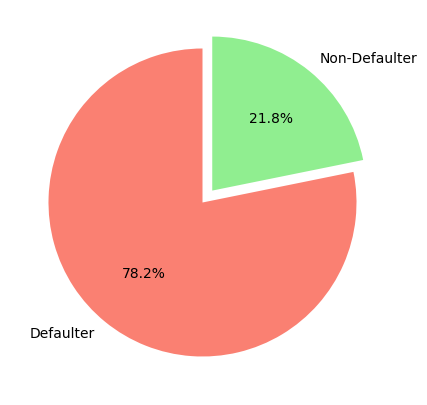

<Figure size 640x480 with 0 Axes>

In [24]:
count_loan_status = debt_risk['loan_status'].value_counts()
print(count_loan_status)
plt.figure(figsize=(7,5))
plt.pie(count_loan_status,
        labels=['Defaulter', 'Non-Defaulter'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['salmon', 'lightgreen'],
        explode=(0, 0.1))
plt.figure('Defaulter and Non-Defaulter Distribution')
plt.show()

<ipython-input-25-55577a385ee7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='person_home_ownership', y = 'loan_status', data=debt_risk, palette='pastel')


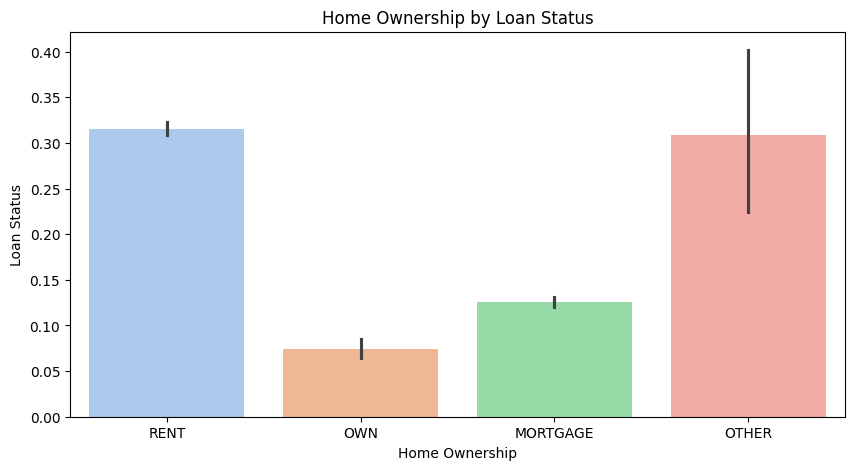

In [25]:
plt.figure(figsize=(10,5))
sn.barplot(x='person_home_ownership', y = 'loan_status', data=debt_risk, palette='pastel')
plt.title('Home Ownership by Loan Status')
plt.ylabel('Loan Status')
plt.xlabel('Home Ownership')
plt.show()

<ipython-input-26-6289ff6925fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='loan_intent', y = 'loan_status', data=debt_risk, palette='pastel')


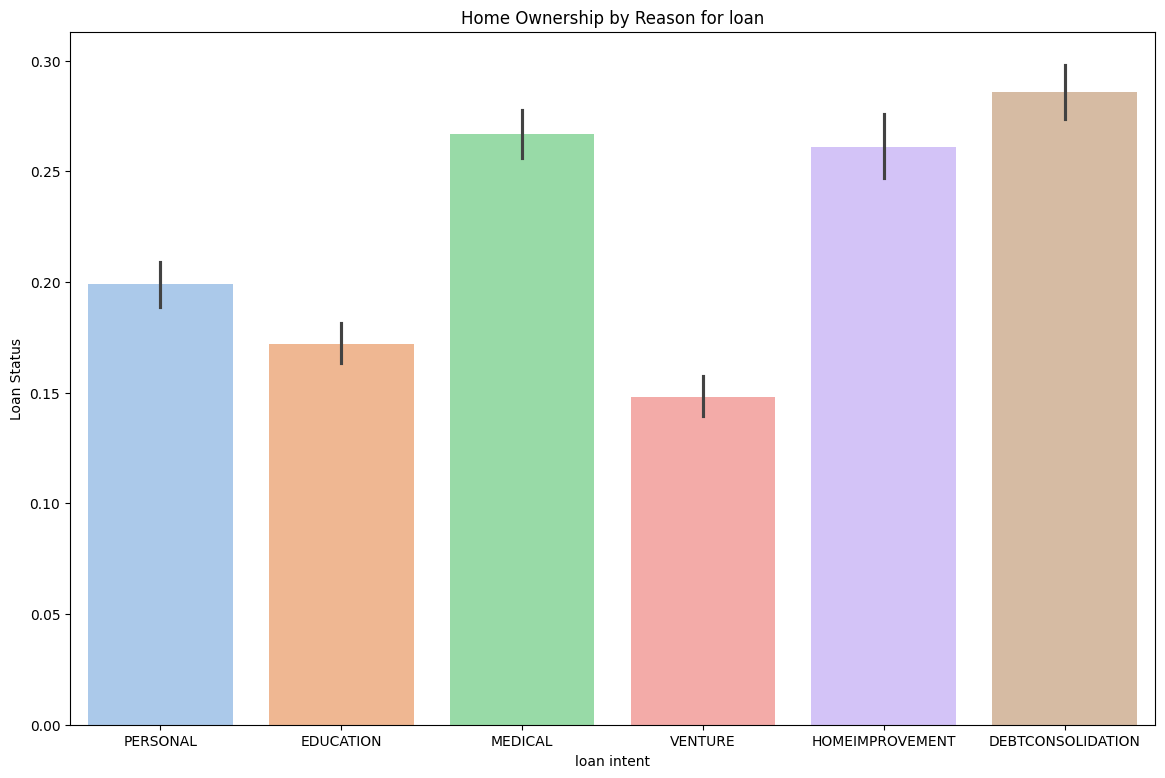

In [26]:
plt.figure(figsize=(14,9))
sn.barplot(x='loan_intent', y = 'loan_status', data=debt_risk, palette='pastel')
plt.title('Home Ownership by Reason for loan')
plt.ylabel('Loan Status')
plt.xlabel('loan intent')
plt.show()

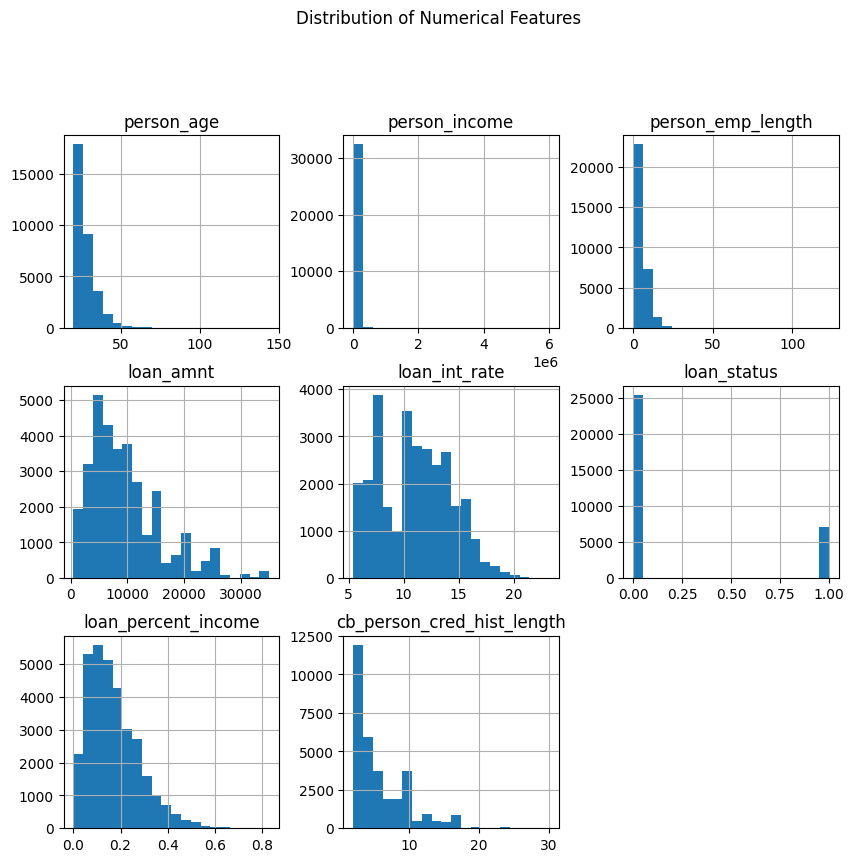

In [31]:
debt_risk_number = debt_risk.select_dtypes(include=['float64', 'int64']).columns
debt_risk[debt_risk_number].hist(figsize=(10,9), bins=20,)
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.show()

<ipython-input-33-501ae4c5cdc4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='cb_person_default_on_file', y = 'loan_status', data=debt_risk, palette='pastel')


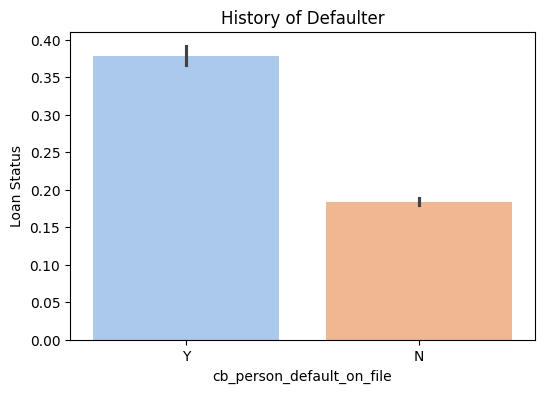

In [33]:
plt.figure(figsize=(6,4))
sn.barplot(x='cb_person_default_on_file', y = 'loan_status', data=debt_risk, palette='pastel')
plt.title('History of Defaulter')
plt.ylabel('Loan Status')
plt.xlabel('cb_person_default_on_file')
plt.show()

Outliers in person_age:
        person_age  person_income person_home_ownership  person_emp_length  \
81            144         250000                  RENT                4.0   
183           144         200000              MORTGAGE                4.0   
575           123          80004                  RENT                2.0   
747           123          78000                  RENT                7.0   
29121          50         900000              MORTGAGE               11.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

             loan_intent loan_grade  loan_amnt  lo

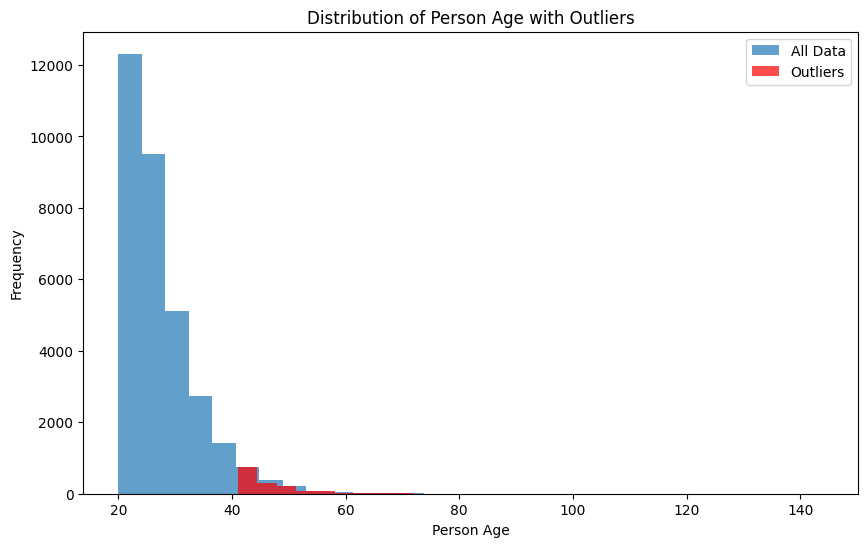

In [39]:
# prompt: give a code for outliers

# Outlier Detection and Treatment
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Example usage for 'person_age'
outliers_age = detect_outliers_iqr(debt_risk, 'person_age')
print("Outliers in person_age:\n", outliers_age)

# Example usage for 'loan_amnt'
outliers_loan_amount = detect_outliers_iqr(debt_risk, 'loan_amnt')
print("\nOutliers in loan_amnt:\n", outliers_loan_amount)


# Visualize outliers (example with 'person_age')
plt.figure(figsize=(10, 6))
plt.title('Distribution of Person Age with Outliers')
plt.xlabel('Person Age')
plt.ylabel('Frequency')
plt.hist(debt_risk['person_age'], bins=30, alpha=0.7, label='All Data')
plt.hist(outliers_age['person_age'], bins=30, alpha=0.7, label='Outliers', color='red')
plt.legend()
plt.show()

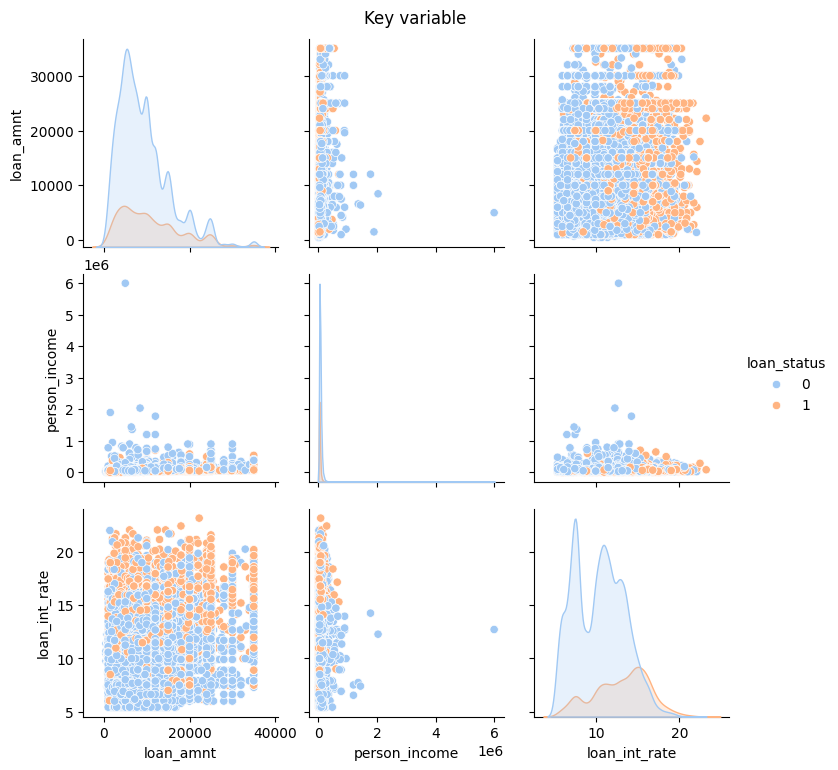

In [42]:
sn.pairplot(debt_risk, vars=['loan_amnt', 'person_income', 'loan_int_rate'], hue= 'loan_status', palette= 'pastel')
plt.suptitle('Key variable', y = 1.02)
plt.show()

**Correlation**

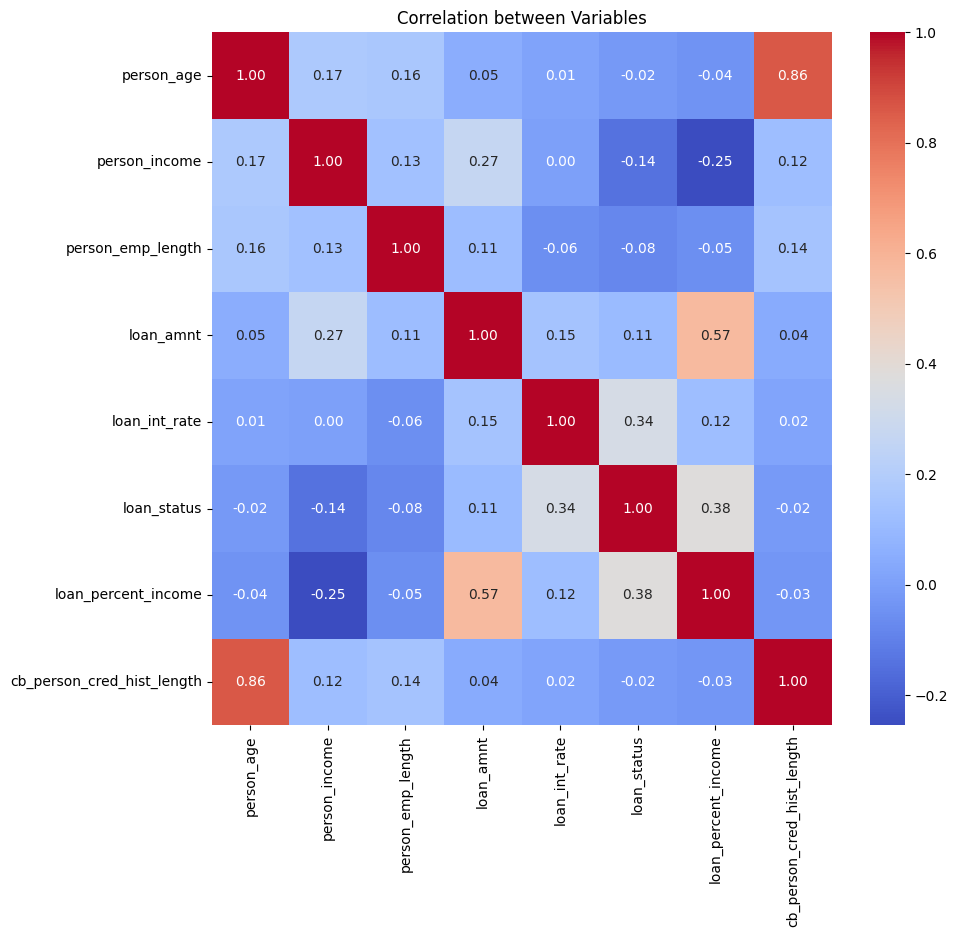

In [45]:
plt.figure(figsize=(10,9))
sn.heatmap(debt_risk[debt_risk_number].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Variables')
plt.show()

Handle missing values

In [47]:
debt_risk['person_emp_length'].fillna('Uknown', inplace=True)
for col in ['person_income', 'loan_int_rate', 'loan_amnt', 'loan_percent_income']:
    debt_risk[col].fillna(debt_risk[col].mean(), inplace=True)

<ipython-input-47-630c44c1c92d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  debt_risk['person_emp_length'].fillna('Uknown', inplace=True)
<ipython-input-47-630c44c1c92d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [48]:
debt_risk.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [50]:
debt_risk.drop(columns=['person_home_ownership',], inplace=True)

In [51]:

debt_risk.head()

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Ecoding Categorical Data

In [52]:
lb = LabelEncoder()
debt_risk['loan_intent'] = lb.fit_transform(debt_risk['loan_intent'])
debt_risk['loan_grade'] = lb.fit_transform(debt_risk['loan_grade'])
debt_risk['cb_person_default_on_file'] = lb.fit_transform(debt_risk['cb_person_default_on_file'])

In [55]:
y = debt_risk['loan_status']
X = debt_risk.drop(columns=['loan_status', 'loan_grade', 'person_emp_length', 'loan_int_rate'])
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
x_train.head()
x_test.head()

,person_age,person_income,loan_intent,loan_amnt,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
6616,22,50000,4,6000,0.12,0,2
21802,32,52000,4,7125,0.14,0,10
31886,37,205000,1,18000,0.09,0,14
17799,26,100000,0,24000,0.24,0,4
5207,23,44340,5,3000,0.07,1,3


In [54]:
credit_risk_scaler = StandardScaler()
x_train = credit_risk_scaler.fit_transform(x_train)
x_test = credit_risk_scaler.transform(x_test)

# Model Building

In [57]:

log_regression = LogisticRegression(random_state =42)
R_f = RandomForestClassifier(random_state =42)
XG_boost = XGBClassifier(random_state = 42)

log_regression.fit(x_train, y_train)
R_f.fit(x_train, y_train)
XG_boost.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [62]:
prediction_log_regression = log_regression.predict(x_test)
probs_log_regression = log_regression.predict_proba(x_test)[:, 1]
print('Log Reg AUC', roc_auc_score(y_test,probs_log_regression) )
print(classification_report(y_test, prediction_log_regression))

Log Reg AUC 0.764933354865157
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      5095
           1       0.71      0.15      0.25      1422

    accuracy                           0.80      6517
   macro avg       0.76      0.57      0.57      6517
weighted avg       0.78      0.80      0.75      6517



In [63]:
prediction_R_f = R_f.predict(x_test)
probs_R_f = R_f.predict_proba(x_test)[:, 1]
print('R_f AUC', roc_auc_score(y_test,probs_R_f) )
print(classification_report(y_test, prediction_R_f))

R_f AUC 0.845985695139743
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      5095
           1       0.72      0.49      0.58      1422

    accuracy                           0.85      6517
   macro avg       0.80      0.72      0.74      6517
weighted avg       0.84      0.85      0.84      6517



In [65]:
prediction_XG_boost = XG_boost.predict(x_test)
probs_XG_boost = XG_boost.predict_proba(x_test)[:, 1]
print('XG_boost AUC', roc_auc_score(y_test,probs_XG_boost) )
print(classification_report(y_test, prediction_XG_boost))

XG_boost AUC 0.8742956264173393
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      5095
           1       0.77      0.53      0.63      1422

    accuracy                           0.86      6517
   macro avg       0.82      0.74      0.77      6517
weighted avg       0.85      0.86      0.85      6517

